<a href="https://colab.research.google.com/github/ryuzin7/tugascui/blob/main/PRAKTIKUM_1_Kecerdasan_buatan_(G_211_22_0035).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Social_Network_Ads.csv to Social_Network_Ads (2).csv


<ipython-input-24-27a96ab78b3c>:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


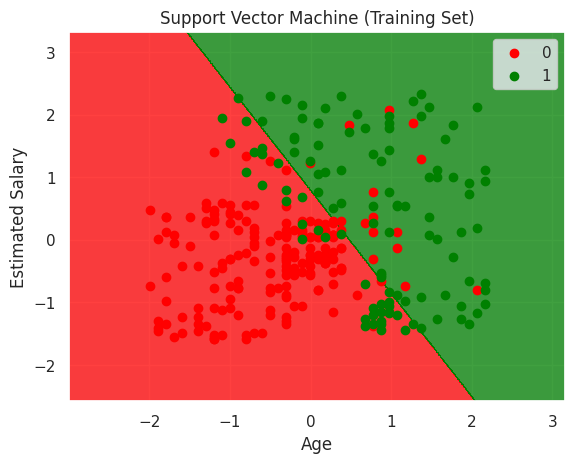

<ipython-input-24-27a96ab78b3c>:68: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


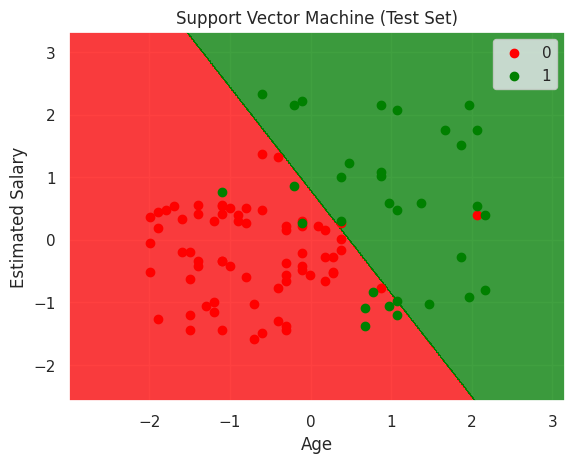

In [24]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Mengunggah file CSV 'Social_Network_Ads.csv' jika belum ada
from google.colab import files
uploaded = files.upload()

# Membaca file CSV
datasets = pd.read_csv('Social_Network_Ads.csv')

# Memilih fitur yang akan digunakan
X = datasets.iloc[:, [2, 3]].values
Y = datasets.iloc[:, 4].values

# Memisahkan dataset menjadi Training Set dan Test Set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Membuat model Support Vector Machine
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

# Melakukan prediksi terhadap Test Set
Y_Pred = classifier.predict(X_Test)

# Membuat confusion matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# Visualisasi hasil pada Training Set
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green'))
             )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Support Vector Machine (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualisasi hasil pada Test Set
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green'))
             )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Support Vector Machine (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

# For normalization
from sklearn.preprocessing import StandardScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# For splitting function
from sklearn.model_selection import train_test_split

# Naive Bayes Machine learning library
from sklearn.naive_bayes import GaussianNB

# Import the metrics
from sklearn import metrics

# Import the classification_report from metrics
from sklearn.metrics import classification_report



In [30]:
diabetes_data = pd.read_csv('pima-indians-diabetes.csv')

In [31]:
diabetes_data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [32]:
diabetes_data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [33]:
diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
diabetes_data.shape

(768, 9)

In [36]:
diabetes_data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [37]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: xlabel='class', ylabel='count'>

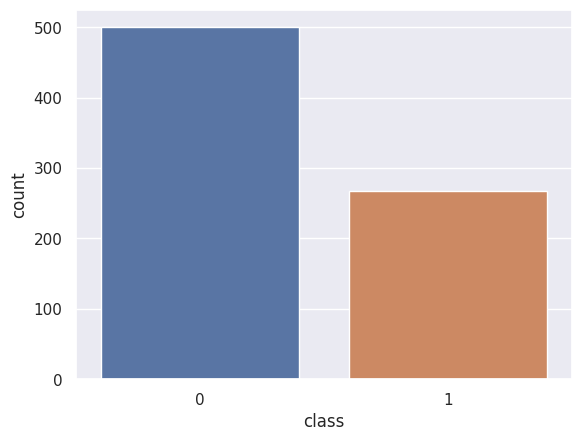

In [38]:
# countplot (shows the count of the class)
sns.countplot(x="class", data=diabetes_data)

array([[<Axes: title={'center': 'Preg'}>,
        <Axes: title={'center': 'Plas'}>,
        <Axes: title={'center': 'Pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

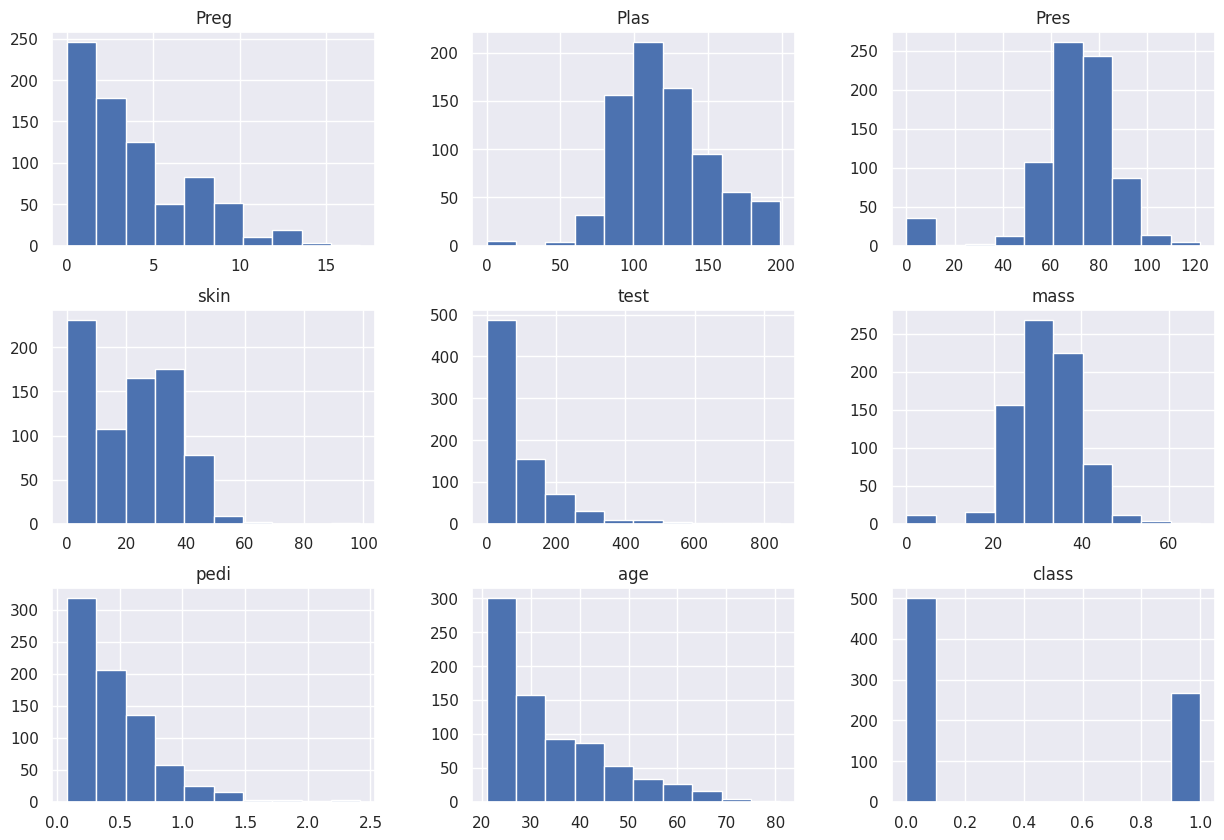

In [41]:
# histogram
diabetes_data.hist(figsize=(15,10))

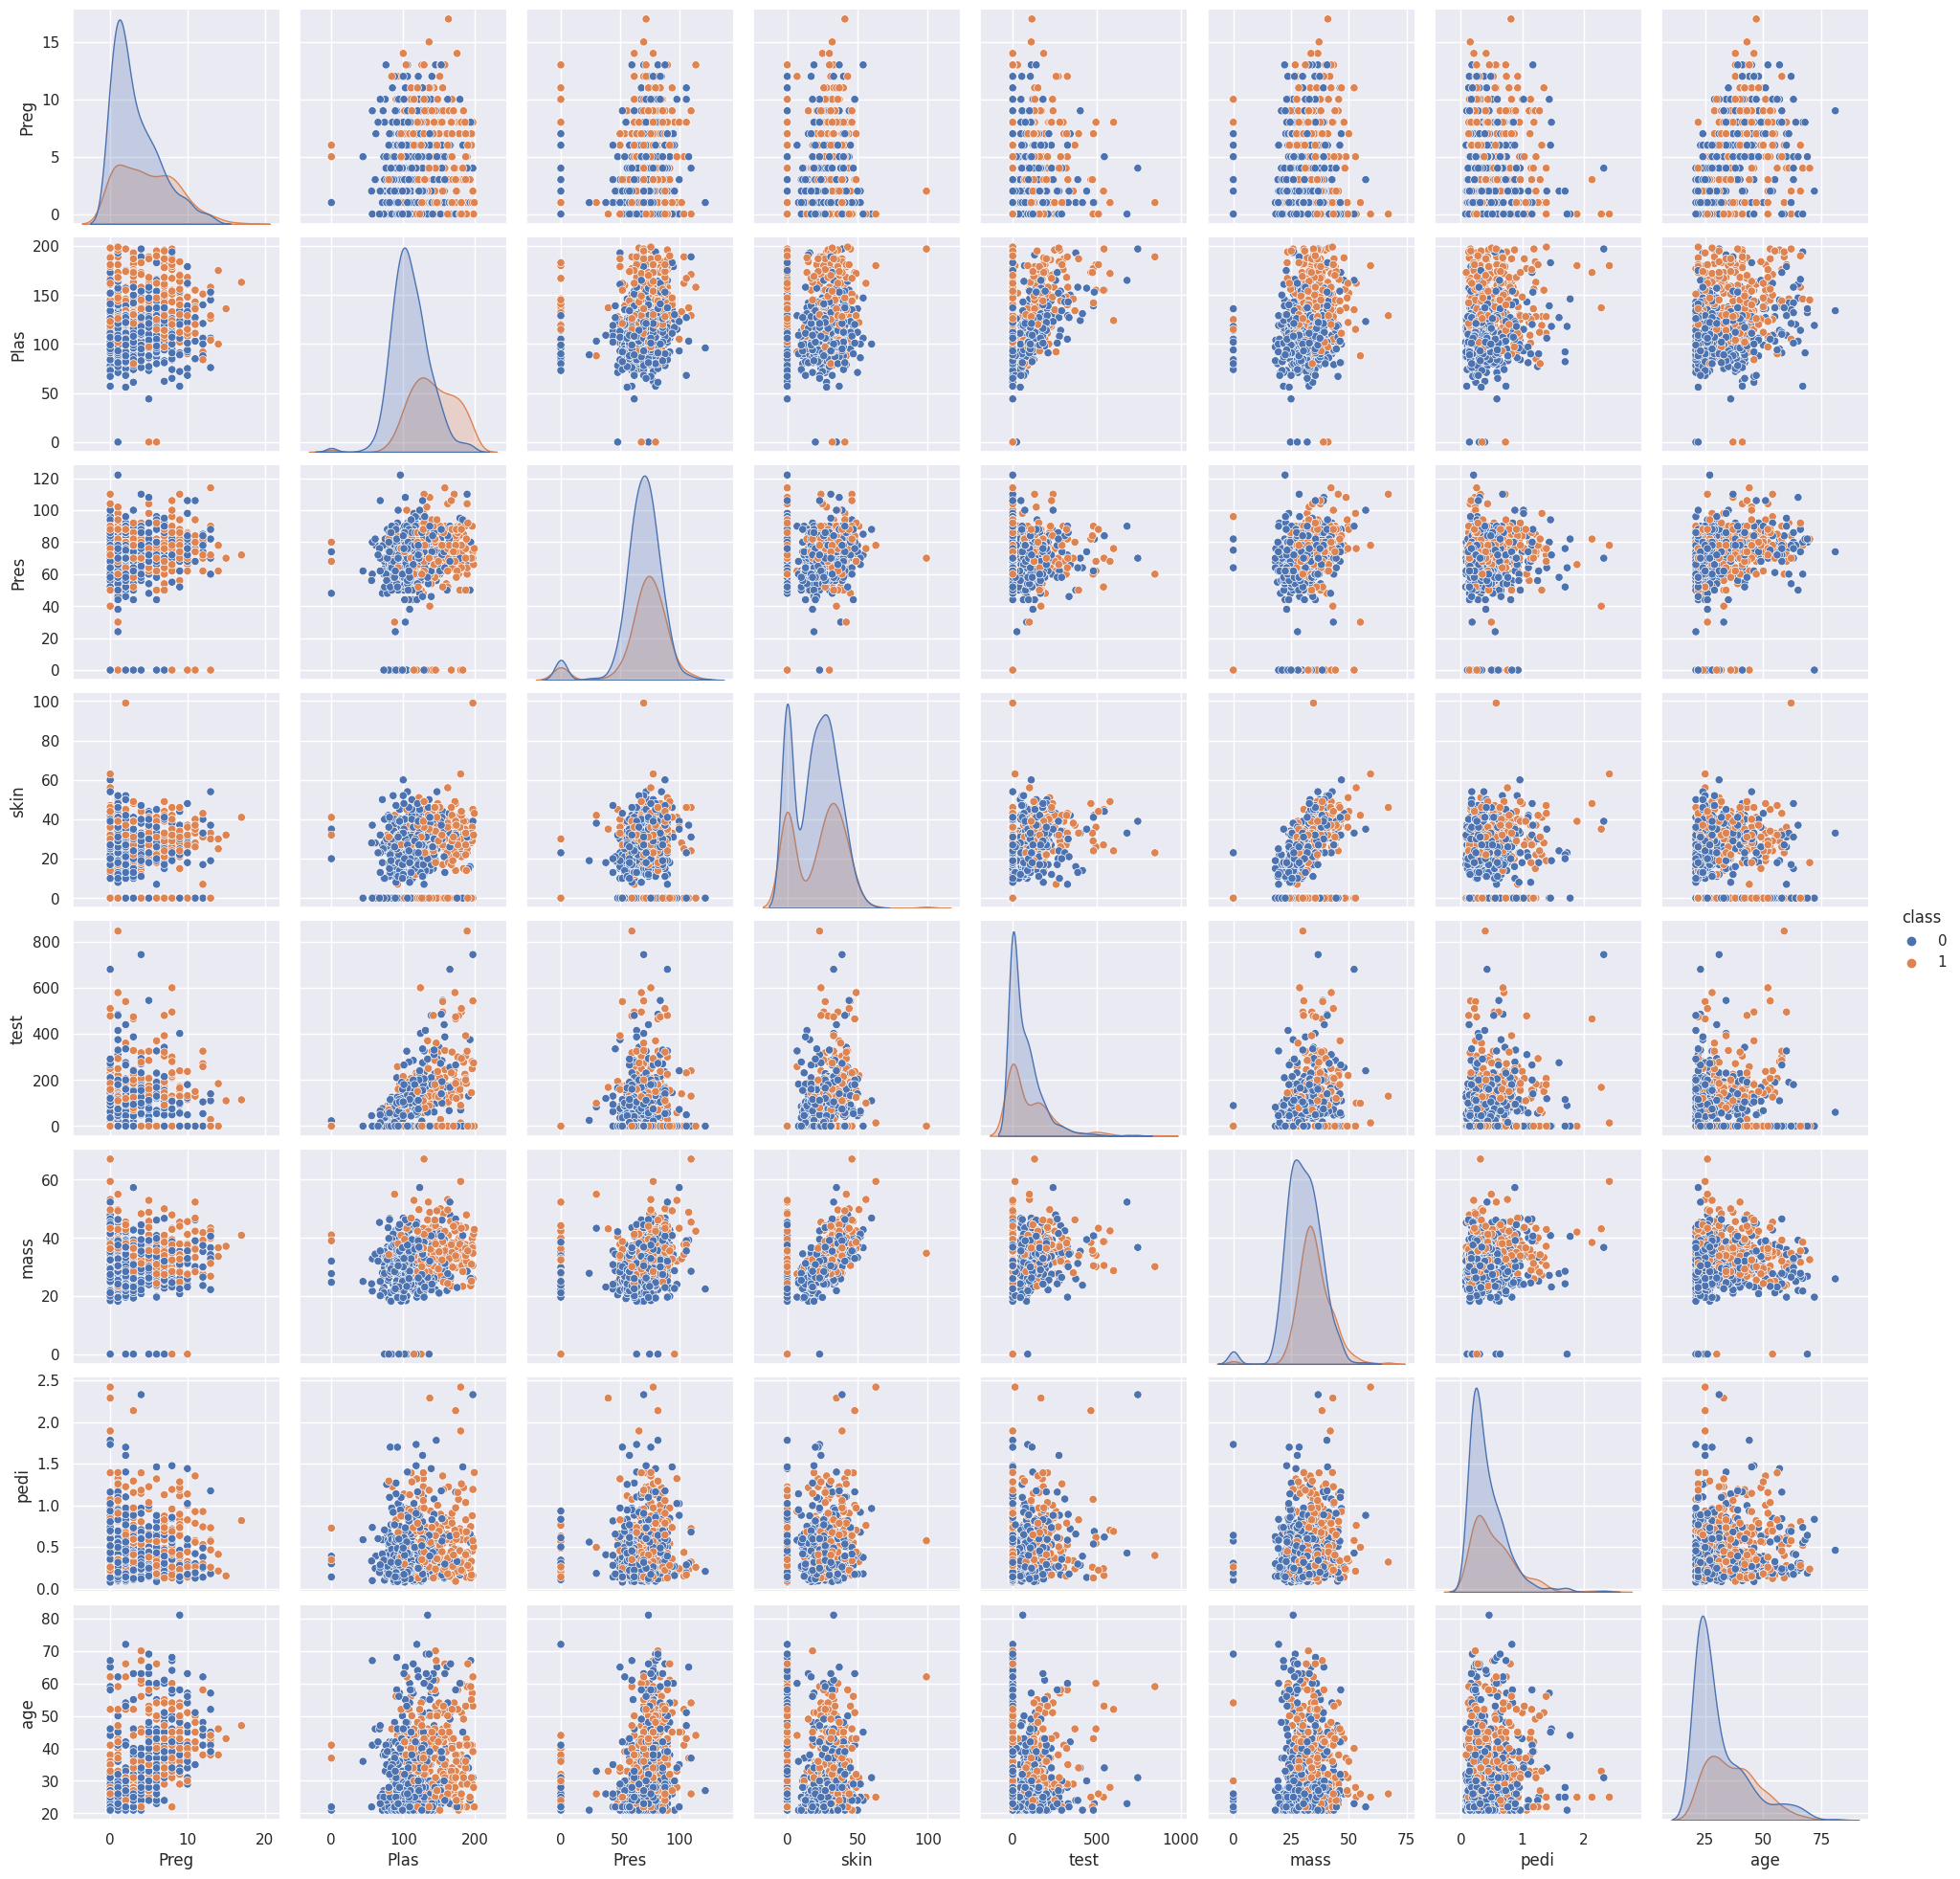

In [43]:
# scatter plot (witch shows the relationship between the attributes)

sns.pairplot(diabetes_data,hue="class")


In [44]:
# correlation matrix
cor=diabetes_data.corr()
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

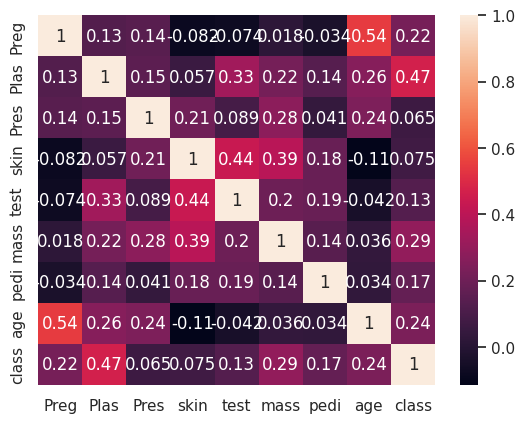

In [45]:
sns.heatmap (cor, annot=True)

In [47]:
#check the missing values in the dataset

diabetes_data.isnull().values.any()

False

In [48]:
diabetes_data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [49]:
data = diabetes_data [['Plas','Pres','skin','mass','pedi']]=diabetes_data[['Plas','Pres','skin','mass','pedi']].replace(0,np.nan)
data.head(15)

,Plas,Pres,skin,mass,pedi
0,148.0,72.0,35.0,33.6,0.627
1,85.0,66.0,29.0,26.6,0.351
2,183.0,64.0,NaN,23.3,0.672
3,89.0,66.0,23.0,28.1,0.167
4,137.0,40.0,35.0,43.1,2.288
5,116.0,74.0,NaN,25.6,0.201
6,78.0,50.0,32.0,31.0,0.248
7,115.0,NaN,NaN,35.3,0.134
8,197.0,70.0,45.0,30.5,0.158
9,125.0,96.0,NaN,NaN,0.232


In [54]:
data.isnull().sum() [['Plas','Pres','skin','mass','pedi']]

Plas      5
Pres     35
skin    227
mass     11
pedi      0
dtype: int64

In [56]:
diabetes_data['Plas'].fillna(diabetes_data['Plas'].median(),inplace=True)
diabetes_data['Pres'].fillna(diabetes_data['Pres'].median(),inplace=True)
diabetes_data['skin'].fillna(diabetes_data['skin'].median(),inplace=True)
diabetes_data['test'].fillna(diabetes_data['test'].median(),inplace=True)
diabetes_data['mass'].fillna(diabetes_data['mass'].median(),inplace=True)

diabetes_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


<Axes: >

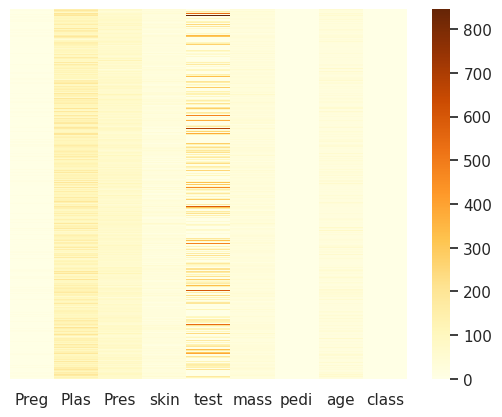

In [61]:
sns.heatmap(diabetes_data, yticklabels=False, cmap="YlOrBr")


In [62]:
maxvalues = diabetes_data.max()
maxvalues

Preg      17.00
Plas     199.00
Pres     122.00
skin      99.00
test     846.00
mass      67.10
pedi       2.42
age       81.00
class      1.00
dtype: float64

In [68]:
#Divinding the age into buckets
def age(df):
    df.loc[(df['age'] > 20) & (df['age'] <= 39), 'age'] = 1
    df.loc[(df['age'] > 40) & (df['age'] <= 59), 'age'] = 2
    df.loc[(df['age'] > 60) & (df['age'] <= 81), 'age'] = 3
    return df
age(diabetes_data)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,0,33.6,0.627,2,1
1,1,85.0,66.0,29.0,0,26.6,0.351,1,0
2,8,183.0,64.0,29.0,0,23.3,0.672,1,1
3,1,89.0,66.0,23.0,94,28.1,0.167,1,0
4,0,137.0,40.0,35.0,168,43.1,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,3,0
764,2,122.0,70.0,27.0,0,36.8,0.340,1,0
765,5,121.0,72.0,23.0,112,26.2,0.245,1,0
766,1,126.0,60.0,29.0,0,30.1,0.349,2,1


In [82]:
x= diabetes_data.drop("class", axis=1)
y= diabetes_data["class"]


In [ ]:
#Split X and y into training and test and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
columns = X_train.columns



In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)